# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True) 

In [4]:
data = pd.read_csv('train.csv') 

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# How many passengers was travelling by first class?

In [6]:
classes=data.Pclass

In [7]:
from collections import Counter
c = Counter(classes)
c

Counter({1: 216, 2: 184, 3: 491})

So, we can see that there are 216 passengers in the first class, 184 in the second class, and 491 in the third.

# What is the most popular female name on board?

In [8]:
females=data.Name[data.Sex == 'female']
import re
i=0
for element in females:
    females[i]=element
    result = re.findall(r'Miss\.|Mrs\.', element)
    print('result=',result)
    if result == 'Miss\.':
        search = re.split(r'\s',element)
        print('search=',search)
    else:
        search = re.split(r'[\(,\s]',element)
        print('search=',search)    
i=i+1

result= ['Mrs.']
search= ['Cumings', '', 'Mrs.', 'John', 'Bradley', '', 'Florence', 'Briggs', 'Thayer)']
result= ['Miss.']
search= ['Heikkinen', '', 'Miss.', 'Laina']
result= ['Mrs.']
search= ['Futrelle', '', 'Mrs.', 'Jacques', 'Heath', '', 'Lily', 'May', 'Peel)']
result= ['Mrs.']
search= ['Johnson', '', 'Mrs.', 'Oscar', 'W', '', 'Elisabeth', 'Vilhelmina', 'Berg)']
result= ['Mrs.']
search= ['Nasser', '', 'Mrs.', 'Nicholas', '', 'Adele', 'Achem)']
result= ['Miss.']
search= ['Sandstrom', '', 'Miss.', 'Marguerite', 'Rut']
result= ['Miss.']
search= ['Bonnell', '', 'Miss.', 'Elizabeth']
result= ['Miss.']
search= ['Vestrom', '', 'Miss.', 'Hulda', 'Amanda', 'Adolfina']
result= ['Mrs.']
search= ['Hewlett', '', 'Mrs.', '', 'Mary', 'D', 'Kingcome)', '']
result= ['Mrs.']
search= ['Vander', 'Planke', '', 'Mrs.', 'Julius', '', 'Emelia', 'Maria', 'Vandemoortele)']
result= ['Mrs.']
search= ['Masselmani', '', 'Mrs.', 'Fatima']
result= ['Miss.']
search= ['McGowan', '', 'Miss.', 'Anna', '"Annie"']
resul

In [50]:
females=data.Name[data.Sex == 'female']
import re
i=0
for element in females:
    females[i]=element
    result = re.findall(r'Miss\.|Mrs\.', element)
    print('result=',result) 
    #data['MrsOrMiss']= result 
i=i+1


result= ['Mrs.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= []
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= ['Mrs.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Mrs.']
result= ['Miss.']
result= ['Miss.']
result= []
result= ['Mrs.']
result= ['Mrs.']
result= ['M

In [69]:
data['Females'] = data.Name[data.Sex == 'female']
#data['Females'] = data['Females'].dropna() 
data['Female_names'] = data['Females'].apply(lambda x: x.split('.')[1]).apply(lambda x: x.split()[0])
data['Female_names']
#data['Females']

1            John
3         Jacques
10     Marguerite
11      Elizabeth
52          Henry
66     (Elizabeth
88          Mabel
123         Susan
136         Helen
151        Thomas
177           Ann
194         James
195         Elise
205         Telma
215     Madeleine
218        Albina
230         Henry
251       Wilhelm
257        Gladys
268       William
269        Amelia
275      Kornelia
291     Dickinson
297         Helen
299         James
307        Victor
309         Laura
310      Margaret
311         Emily
318          Mary
          ...    
581          John
585          Ruth
591        Walter
609     Elizabeth
618        Marion
627      Gretchen
641          Emma
689     Georgette
700          John
710        Berthe
716      Caroline
717        Edwina
730     Elisabeth
742         Susan
759            of
763       William
765          John
772        (Mary)
779        Edward
781        Albert
796         Alice
809        Norman
820       Charles
823       (Beila)
835       

In [70]:
data['Females'] = data.Name[data.Sex == 'female']
data['Female_Title'] = data['Females'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
#data['Female_Title']
#data['MrsOrMiss'] = data.Name[data['Name_title'] == 'Mrs.']
#data['MrsOrMiss']

In [122]:
#data['Female_Miss'] = data.Name[data.Female_Title == 'Miss.']
#data.Female_Miss = data.Female_Miss.dropna()
#data.Female_Miss.dropna()
data['Female_Miss'] = data.Name[data.Female_Title != 'Mrs.']
data['Female_Miss']
#data['Female_Miss1'] = data['Female_Miss'].apply(lambda x: x.split('.')[1]).apply(lambda x: x.split()[0])
#data['Female_Miss1']

1                                                    NaN
3                                                    NaN
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
52                                                   NaN
66                                                   NaN
88                            Fortune, Miss. Mabel Helen
123                                  Webber, Miss. Susan
136                         Newsom, Miss. Helen Monypeny
151                                                  NaN
177                           Isham, Miss. Ann Elizabeth
194                                                  NaN
195                                 Lurette, Miss. Elise
205                           Strom, Miss. Telma Matilda
215                              Newell, Miss. Madeleine
218                                Bazzani, Miss. Albina
230                                                  NaN
251                            

# How does ticket cost varie?

In [9]:
cost1 = data.Fare[data.Pclass == 1]
print("Ticket cost variation of 1st class", min(cost1), '\t', max(cost1), '\n')
cost2 = data.Fare[data.Pclass == 2]
print("Ticket cost variation of 2st class", min(cost2), '\t', max(cost2), '\n')
cost3 = data.Fare[data.Pclass == 3]
print("Ticket cost variation of 3st class", min(cost3), '\t', max(cost3), '\n')

Ticket cost variation of 1st class 0.0 	 512.3292 

Ticket cost variation of 2st class 0.0 	 73.5 

Ticket cost variation of 3st class 0.0 	 69.55 



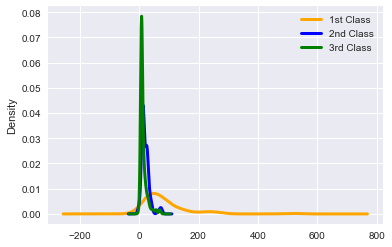

In [23]:
data['Fare'][data['Pclass'] == 1].plot(kind='kde', linewidth=3, style='orange');
data['Fare'][data['Pclass'] == 2].plot(kind='kde', linewidth=3, style='blue');
data['Fare'][data['Pclass'] == 3].plot(kind='kde', linewidth=3, style='green');
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

# What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

In [10]:
#data['Name'].head()
data['Name_Title'] = data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
data['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Sir.           1
Jonkheer.      1
the            1
Capt.          1
Ms.            1
Mme.           1
Lady.          1
Don.           1
Name: Name_Title, dtype: int64

In [11]:
pd.crosstab(data['Name_Title'],data['Pclass'])

Pclass,1,2,3
Name_Title,,,
Capt.,1,0,0
Col.,2,0,0
Don.,1,0,0
Dr.,5,2,0
Jonkheer.,1,0,0
Lady.,1,0,0
Major.,2,0,0
Master.,3,9,28
Miss.,46,34,102


# Are there any dependencies between class and ticket number?

# What part of passengers was able to survive?